## Objectives

Objectives of the final assignments were to define a business problem, look for data in the web and, use Foursquare location data to compare different locations to figure out which neighborhood is suitable for starting a restaurant business. As prepared for the assignment, I go through the problem designing, data preparation and final analysis section step by step.

## 1. Introduction

#### 1.1. Problem Statement

Chennai also known as Madras is the capital of the Indian state of Tamil Nadu. Located on the Coromandel Coast off the Bay of Bengal, it is the biggest cultural, economic and educational centre of south India. According to the 2011 Indian census, it is the sixth-most populous city and fourth-most populous urban agglomeration in India. The city together with the adjoining regions constitutes the Chennai Metropolitan Area, which is the 36th-largest urban area by population in the world.

Chennai as the only South Asian city to feature in its 2015 "Top 10 food cities" list. Chennai was also named the ninth-best cosmopolitan city in the world by Lonely planet.

The south Indian city of Chennai is fast emerging as a destination for information technology outsourcing and has seen a growing number of IT parks being built here. Most of the upcoming complexes are being built along the <b>IT Corridor</b>.

<li>To find a suitable Area for starting a Restaurent near the IT HUBS of Chennai.</li>
<li>This analysis will help to find suitable place for starting a new restaurent as the need for food is more among the office during lunch hours.</li>
<li>This will help the new entrepreneurs who are in need of information regarding business ideas.</li>

#### 1.2 Import Necessary Libraries

We used following packages in this assignments. <b>Geospy, BeautifulSoup, Foursquare, Matplotlib and Folium</b>.

<ui>
    <li><b>BeautifulSoup:</b> Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.</li>
    <li><b>GeoSpy:</b> Geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.</li>
    <li><b>Foursquare:</b> The Foursquare is to help you discover and share information about businesses and attractions around you.</li>
    <li><b>Folium:</b> Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map.</li>
    <li><b>Matplotlib:</b>Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., </li>
</ui>
    

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from bs4 import BeautifulSoup
import requests
import json

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## 2. Data Preparation

The south Indian city of <i>Chennai</i> is fast emerging as a destination for information technology outsourcing and has seen a growing number of IT parks being built here. List of IT parks details are getting from <a>https://en.wikipedia.org/wiki/List_of_tech_parks_in_Chennai</a>.

The BeautifulSoup is used for parsing and extract data from HTML. The result is uploaded into GitHub for later reference. 

In [ ]:
response = requests.get('https://en.wikipedia.org/wiki/List_of_tech_parks_in_Chennai')

soup = BeautifulSoup(response.text, 'lxml')

table = soup.find('table', {'class':'wikitable sortable'})
table_rows = table.find_all('tr')

chennai_list = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    chennai_list.append(row)
    
chennai_df = pd.DataFrame(chennai_list)

chennai_df.columns = ['CompanyName', 'Area', 'Location', 'Investment', 'StartYear', 'CompaniesList']

chennai_df.dropna(axis=0, inplace=True)

chennai_df = chennai_df.drop(chennai_df.columns[[1, 3, 4]], axis=1)

for column in chennai_df.columns:
    chennai_df[column] = chennai_df[column].str.strip()
    
chennai_df = chennai_df[pd.notnull(chennai_df['Location'])]
    
chennai_df.to_csv('chennai_companies.csv')

#### 2.1 Getting Coorinates of Major Areas.

The OpenCage Geocoder (<a>https://api.opencagedata.com/geocode/v1/json</a>) is used to provides text to latitude and longitude via a RESTful API. The result is stored in filename <b>chn_companies_coordinates.csv</b> for further reference.  


In [ ]:
longitude = []
latitude = []
for index, row in chennai_df.iterrows():
    try:
        # api-endpoint 
        URL = "https://api.opencagedata.com/geocode/v1/json"

        # defining a params dict for the parameters to be sent to the API 
        PARAMS = {'pretty':'1', 'q': row['CompanyName'] + ', ' + row['Location'], 'key':'5238a8d178f0435cb5e6d6519281a1e0', 'language':'en'} 

        # sending get request and saving the response as response object 
        r = requests.get(url = URL, params = PARAMS) 

        # extracting data in json format 
        json_coordinates = r.json()  

        if json_coordinates['results']:
            print(row['CompanyName'], json_coordinates['results'][0]['geometry'])
            longitude.append(json_coordinates['results'][0]['geometry']['lng'])
            latitude.append(json_coordinates['results'][0]['geometry']['lat'])
        else: 
            print(row['CompanyName'], ' No data')
            longitude.append(0)
            latitude.append(0)
    except ValueError:
        print('Error in:' + row.Location)

chennai_df['longitude'] = longitude
chennai_df['latitude'] = latitude
# chennai_df.to_csv('chn_companies_coordinates.csv', index=False) ## uncomment if you want to export it in csv file
chennai_df.head()

In [2]:
# read from csv files for coordinates and company name
chennai_df = pd.read_csv('chn_companies_coordinates.csv')
chennai_df.head()

,CompanyName,Location,CompaniesList,longitude,latitude
0,Tidel Park,Taramani,"Cisco Systems, Hexaware Technologies, Sify, Te...",80.240407,12.984907
1,Olympia Tech Park,Guindy,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...",80.220365,13.008710
2,SRM Tech Park,Potheri,SRM Institute of Science and Technology,80.045089,12.825011
3,Bahwan CyberTek IT Park,Thorappakkam,"Zafin Labs, Beroe Consulting India, Identive T...",80.278470,13.087840
4,IITM Research Park,Taramani,"Chakra Network Solutions, Saint-Gobain, Centre...",80.240407,12.984907


## 3. Data Visualization

Data visualization is viewed by many disciplines as a modern equivalent of visual communication. It involves the creation and study of the visual representation of data. To communicate information clearly and efficiently, data visualization uses statistical graphics, plots, information graphics and other tools. 

Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In [3]:
from geopy.geocoders import Nominatim 

address = 'Chennai'

geolocator = Nominatim(user_agent="chennai_explorer")

location = geolocator.geocode(address)

print(location.latitude, location.longitude)

13.0801721 80.2838331


In [4]:
import folium # map rendering library

map_chennai = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)

for index, row in chennai_df.iterrows():
    label = '{}{}'.format(row.CompanyName, row.Location)
    popup_label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [row.latitude, row.longitude],
        radius=5,
        popup=popup_label,
        label=popup_label,
        color='green',
        fill=True,        
        fill_opacity=0.6,
        parse_html=False).add_to(map_chennai) 

map_chennai

## 4. Data Analysis

We are going to focuses on processing and performing statistical analysis on existing data sets. We will concentrate on creating methods to capture, process, and organize data to uncover actionable insights for current problems, and establishing the best way to present this data. We are going to use <b><i>FourSquare</i></b> to explore a list of venues near the current location, optionally matching a search term. We used latitude and longitude of each location to find venues.


In [5]:
CLIENT_ID = '0SFWND5UEBSAUFKQHV15VINMGVUT5CGTP42VZIJC52GCOKQG'
CLIENT_SECRET = 'BV22D1J3PF05NUM0DWJIZCBKP1PYEFGWG0513R1DKR5J2ONX'
VERSION = '20190625'
LIMIT = 100

In [6]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
chennai_venues = getNearbyVenues(names=chennai_df['CompanyName'], latitudes=chennai_df['latitude'], longitudes=chennai_df['longitude'])

chennai_venue_categories = pd.get_dummies(chennai_venues[['Venue Category']], prefix="", prefix_sep="")

chennai_venue_categories['Location'] = chennai_venues['Location']

chennai_grouped = chennai_venue_categories.groupby('Location').mean().reset_index()

chennai_grouped.head()

,Location,ATM,Accessories Store,Afghan Restaurant,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Spa,Sporting Goods Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar
0,A.R Foundations - Acropolis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0
1,ASV suntech Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,Akshaya Homes - stanz park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,Alliance Galleria,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.00,0.0
4,Alliance Orchid Tech Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0


#### 4.1 Grouping Results
 
Next, let's group rows by Location and by taking the mean of the frequency of occurrence of each category. Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [9]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [10]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Location'] = chennai_grouped['Location']

for ind in np.arange(chennai_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)
    
venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A.R Foundations - Acropolis,Flea Market,Vegetarian / Vegan Restaurant,Indian Restaurant,Juice Bar,Whisky Bar,Coworking Space,Department Store,Dessert Shop,Electronics Store,Farmers Market
1,ASV suntech Park,Platform,Indian Restaurant,Hotel,Moving Target,Convenience Store,Farmers Market,Cosmetics Shop,Coworking Space,Department Store,Dessert Shop
2,Akshaya Homes - stanz park,Platform,Indian Restaurant,Hotel,Moving Target,Convenience Store,Farmers Market,Cosmetics Shop,Coworking Space,Department Store,Dessert Shop
3,Alliance Galleria,Hotel,Hyderabadi Restaurant,Train Station,Afghan Restaurant,Bus Station,Flea Market,Coworking Space,Department Store,Dessert Shop,Electronics Store
4,Alliance Orchid Tech Park,Seafood Restaurant,Juice Bar,Chettinad Restaurant,Food Court,Concert Hall,Fast Food Restaurant,Whisky Bar,Cosmetics Shop,Coworking Space,Department Store


#### 4.2 Matplot Library to Analysis Locations

We can use <b>Matplot</b> lib to analysis and visualise results. Matplotlib is used to create 2D graphs and plots by using scripts. It has a module named pyplot which makes things easy for plotting by providing feature to control line styles, font properties, formatting axes etc.

We can use Matplot library to analysis following:

<li>Shortlisted top 10 location with most happening places</li>
<li>There are eighty unique venue categories and Indian Restaurant top the charts as we can see in the plot below.</li>

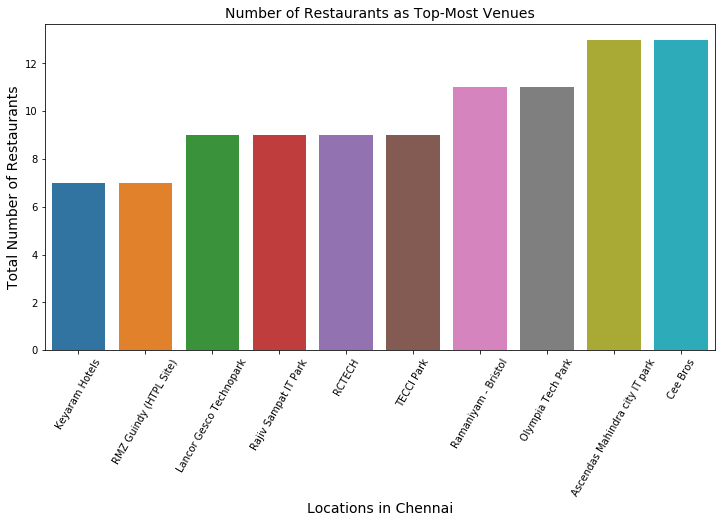

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

chn_restaurant_by_location = chennai_venues.groupby(['Location'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant') | x.str.contains('Hotel')].count())

chn_restaurant_by_location_df = chn_restaurant_by_location.to_frame().reset_index()

chn_restaurant_by_location_df.columns = ['Location', 'Number of Restaurant']

chn_restaurant_by_location_df.sort_values('Number of Restaurant', inplace=True)

chn_restaurant_by_location_df.index = np.arange(1, len(chn_restaurant_by_location_df) + 1)

chn_restaurant_by_location_df = chn_restaurant_by_location_df.tail(10)

fig = plt.figure(figsize=(12,6))

bar = sns.barplot(x='Location', y='Number of Restaurant', data=chn_restaurant_by_location_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Locations in Chennai", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)

plt.show()

#### There are eighty unique venue categories and Indian Restaurants top the charts as we can see in the plot below —

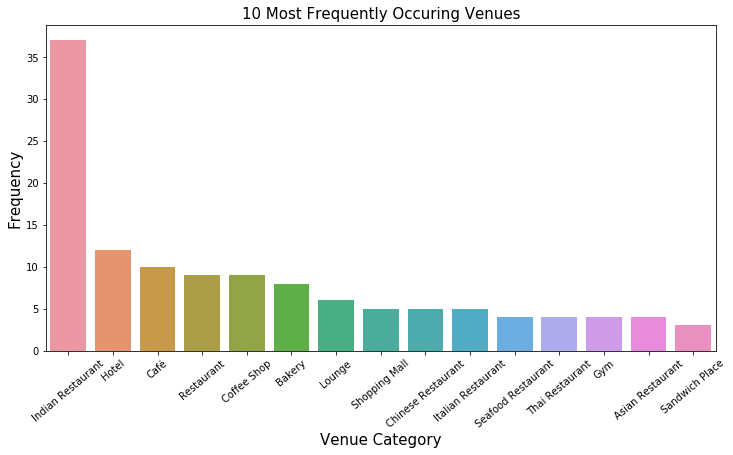

In [14]:
import seaborn as sns

chn_top_10_location = chennai_venues[chennai_venues['Location'].isin(chn_restaurant_by_location_df['Location'].values)]

chn_top_10_venues = chn_top_10_location['Venue Category'].value_counts()[0:15].to_frame(name='frequency').reset_index()

chn_top_10_venues.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)

fig = plt.figure(figsize=(12,6))

s=sns.barplot(x="Venue_Category", y="Frequency", data=chn_top_10_venues)

s.set_xticklabels(s.get_xticklabels(), rotation=40)
plt.title('10 Most Frequently Occuring Venues', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=200)
plt.show()

#### 4.3. Clustering Locations

We have a data set of locations and venues. The task is to categorize those items into groups. To achieve this, we will use the <b>kMeans</b> algorithm; an unsupervised learning algorithm.

kMean algorithm used to categorize the items into k groups of similarity. To calculate that similarity, we will use the euclidean distance as measurement. We categorized the location into <b><i>four</i></b> clusters. 

In [15]:
from sklearn.cluster import KMeans

chn_location_to_compare = chennai_grouped[chennai_grouped['Location'].isin(chn_top_10_location['Location'].values)]

chn_clustered = chn_location_to_compare.drop('Location', 1)

kmeans = KMeans(n_clusters=4, random_state=0).fit(chn_clustered)

print ("Check the 4 Cluster labels :",  kmeans.labels_[0:10])

Check the 4 Cluster labels : [2 2 1 3 1 0 1 0 1 0]


In [16]:
final_df = venues_sorted[venues_sorted['Location'].isin(chn_top_10_location['Location'].values)]

final_df.insert(1, 'Cluster Label', kmeans.labels_)

final_df = pd.merge(chennai_df, final_df, left_on='CompanyName', right_on='Location', how='inner')

final_df= final_df.drop(['Location_y'], axis=1)

final_df

,CompanyName,Location_x,CompaniesList,longitude,latitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Olympia Tech Park,Guindy,"HP, Verizon, ABN Amro, Visteon, Hewitt, Merril...",80.220365,13.008710,1,Hotel,Indian Restaurant,Restaurant,Whisky Bar,Lounge,Concert Hall,Café,Bus Station,Dessert Shop,Italian Restaurant
1,RMZ Guindy (HTPL Site),Guindy,NaN,80.219440,13.008060,1,Indian Restaurant,Whisky Bar,South Indian Restaurant,Hotel,Vegetarian / Vegan Restaurant,Italian Restaurant,Lounge,Coffee Shop,Bus Station,Gym Pool
2,RCTECH,"3D, Mercury Apartments, Pantheon Road, Egmore,...",NaN,80.255560,13.071670,0,Indian Restaurant,Shopping Mall,Seafood Restaurant,Bakery,Coffee Shop,Café,Kebab Restaurant,Sandwich Place,Fast Food Restaurant,Museum
3,Cee Bros,76 Anna salai Teynampet,NaN,80.245197,13.034506,2,Indian Restaurant,Lounge,Café,Burger Joint,Chinese Restaurant,Pizza Place,Italian Restaurant,Restaurant,Sushi Restaurant,Asian Restaurant
4,Rajiv Sampat IT Park,402/403 Pantheon Rd Egmore,NaN,80.255560,13.071670,0,Indian Restaurant,Shopping Mall,Seafood Restaurant,Bakery,Coffee Shop,Café,Kebab Restaurant,Sandwich Place,Fast Food Restaurant,Museum
5,Keyaram Hotels,1 Harrington Rd Chetpet,NaN,80.240830,13.070000,1,Indian Restaurant,Hotel,Coffee Shop,Café,Burger Joint,Dessert Shop,Department Store,Concert Hall,Chinese Restaurant,Restaurant
6,Lancor Gesco Technopark,Alwarpet,NaN,80.254549,13.033860,3,Japanese Restaurant,Bakery,Café,Restaurant,Chinese Restaurant,Sandwich Place,Food & Drink Shop,Indian Restaurant,Italian Restaurant,Juice Bar
7,Ramaniyam - Bristol,Guindy,"Airtel, India Property, HQ10",80.220365,13.008710,1,Hotel,Indian Restaurant,Restaurant,Whisky Bar,Lounge,Concert Hall,Café,Bus Station,Dessert Shop,Italian Restaurant
8,Ascendas Mahindra city IT park,Mahindra city,NaN,80.221951,12.979777,2,Indian Restaurant,Ice Cream Shop,Chinese Restaurant,Restaurant,Gym,Gift Shop,Market,Fast Food Restaurant,Department Store,Convenience Store
9,TECCI Park,"OMR,Karapakkam,Chennai-600083","Uninor, Vestas, Valeo, First source, Qmax, Pat...",80.252000,13.069700,0,Indian Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Shopping Mall,Café,Kebab Restaurant,Whisky Bar,Coworking Space,Department Store,Dessert Shop


## 5. Result and Discussion

The Data exploration mostly concentrated to analysis of Restaurants Near IT HUBS. The below list  summeraise our findings.

<li>Indian Restaurants, Coffee Shop and Bakeries are commonly found near all the IT HUBS of Chennai.</li>
<li>We observed that Ramaniyam - Bristol, Olympia Tech Park, Ascendas Mahindra City IP Park and CEE Bros were surrounded by more number of restaurants.</li>
<li>Keyaram Hotels, RMZ Guindy were surrounded by least number of restaurants.</li>
<li>My analysis is based on only Top 10 IT HUBS in Chennai that we catagorised the location into 4 Clusters in that we consider Lancor Gesco IT Technopark is in seperate Cluster.</li>

## 6. Conclusion

I’ve made use of some frequently used Python libraries to scrap web-data, use Foursquare API to explore the Major IT HUBS in Chennai the results of segmentation of Location using Folium Map.

Finally, since my analysis were mostly concentrated on the possibilities of opening a restaurants targeting the huge pool of office workers, and  also as a resident of the city. Specially cafe, bars, pubs as most frequent venues around all the IT HUBS. As per my analysis i have concluded that Loncor Gesco IT Technopark in Alwarpet is the place in seperate cluster. Hopefully, this kind of analysis will provide you initial guidance to take more real-life challenges using data-science.
